In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Make dataset 

In [ ]:
path = "/content/drive/MyDrive/SplitDocsRes.zip"

In [ ]:
! cp /content/drive/MyDrive/out_pages_txt.zip ./

In [ ]:
! unzip out_pages_txt.zip

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: out_pages/single/10 (5).tif[0].docx  
  inflating: out_pages/single/10 (5).tif[0].txt  
  inflating: out_pages/single/10 (500).tif[0].docx  
  inflating: out_pages/single/10 (500).tif[0].txt  
  inflating: out_pages/single/10 (6).tif[0].docx  
  inflating: out_pages/single/10 (6).tif[0].txt  
  inflating: out_pages/single/10 (60).tif[0].docx  
  inflating: out_pages/single/10 (60).tif[0].txt  
  inflating: out_pages/single/10 (61).tif[0].docx  
  inflating: out_pages/single/10 (61).tif[0].txt  
  inflating: out_pages/single/10 (62).tif[0].docx  
  inflating: out_pages/single/10 (62).tif[0].txt  
  inflating: out_pages/single/10 (67).tif[0].docx  
  inflating: out_pages/single/10 (67).tif[0].txt  
  inflating: out_pages/single/10 (68).tif[0].docx  
  inflating: out_pages/single/10 (68).tif[0].txt  
  inflating: out_pages/single/10 (69).tif[0].docx  
  inflating: out_pages/single/10 (69).tif[0].txt  
  infla

In [ ]:
!find SplitDocsRes/Invoice_tr -type f -name "*.txt" > txt_tr.txt

In [ ]:
!find SplitDocsRes/Invoice_test -type f -name "*.txt" > txt_test.txt

In [ ]:
! ls SplitDocsRes/Invoice_tr/

first  intermediate  last  single


In [1]:
list_of_texts = []
list_of_clases = []
clases = ['first','intermediate',  'last',  'single']
with open("txt_test.txt") as file:
    for line in file:
        file_name = line.rstrip()
        file_ = open(file_name,"rb") 
        x = file_.read()
        list_of_texts.append(x.decode("utf-16"))
        list_of_clases.append(file_name)
        file_.close()

FileNotFoundError: [Errno 2] No such file or directory: 'txt_test.txt'

In [ ]:
print(list_of_clases)

['SplitDocsRes/Invoice_tr/single/~~$42.tmp_10729.pdf[0].txt', 'SplitDocsRes/Invoice_tr/single/goodman fielder_clean5.pdf[0].txt', 'SplitDocsRes/Invoice_tr/single/38 (2).tif[0].txt', 'SplitDocsRes/Invoice_tr/single/20190131150048_00001.jpg[0].txt', 'SplitDocsRes/Invoice_tr/single/daiichi houki 220.TIF[0].txt', 'SplitDocsRes/Invoice_tr/single/Tokyou nissan 255.TIF[0].txt', 'SplitDocsRes/Invoice_tr/single/CT.pdf[0].txt', 'SplitDocsRes/Invoice_tr/single/Testfacturen Abbyy (83).tif[0].txt', 'SplitDocsRes/Invoice_tr/single/0522.TIF[0].txt', 'SplitDocsRes/Invoice_tr/single/67b291eb-090a-4acc-94f7-72419c752807.tif[0].txt', 'SplitDocsRes/Invoice_tr/single/0419.tif[0].txt', 'SplitDocsRes/Invoice_tr/single/Page1.tif[0].txt', 'SplitDocsRes/Invoice_tr/single/Page_5.tif[0].txt', 'SplitDocsRes/Invoice_tr/single/Austria_0509_I0702-g02jlj__00237D37568C1ED3948680F0DB494036.pdf[0].txt', 'SplitDocsRes/Invoice_tr/single/Image_00000012__e59c8aed-0268-42e1-aa8a-bc9bac0e99cf__.tif[0].txt', 'SplitDocsRes/Invoi

In [ ]:
classes = []
for cl in list_of_clases:
  spliting = cl.split(sep='/')[2]
  #print(spliting)
  classes.append(spliting)

In [ ]:
import pandas as pd

data = {'Text':list_of_texts,
        'MLclass':classes}
train = pd.DataFrame(data)

In [ ]:
train.head()

,Text,MLclass
0,Ryder\r\nEver better.\r\nInvoice\r\n6 April 20...,single
1,j 'ivauu ii\r\nA-5300 HALLWANu-SALZBURG WiQngr...,single
2,Anthony Ferguson\r\nINVOICE\r\nCrossways The C...,single
3,RICEVUTA FISCALE - FATTURA\r\n(Legge 30 dicemb...,single
4,FACTURE:FACT-016436\r\nCentre ^ France\r\nLAMO...,single


In [ ]:
train.to_csv("test.csv")

In [ ]:
! cp 

# Новый раздел

In [3]:
import pandas as pd
import numpy as np
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
from sklearn.model_selection import train_test_split
import gensim
from sklearn.linear_model import LogisticRegression
from gensim.models.doc2vec import TaggedDocument
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
import pandas as pd


train = pd.read_csv('train_6128.csv')
test = pd.read_csv('test_1532.csv')

In [8]:
train.shape

(6128, 3)

In [9]:
test.shape

(1532, 3)

In [10]:
import nltk
from nltk.corpus import stopwords
def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            if len(word) < 2:
                continue
            tokens.append(word.lower())
    return tokens

In [11]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
train['MLclass'] = train['MLclass'].astype('str')
test['MLclass'] = test['MLclass'].astype('str')

In [13]:
train['Text'] = train['Text'].astype('str')
test['Text'] = test['Text'].astype('str')

D:\programs\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


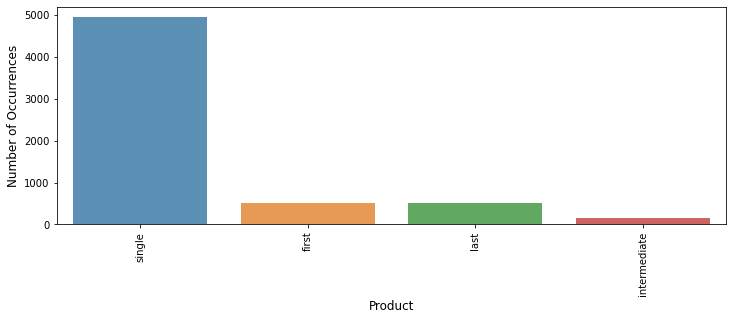

In [14]:
cnt_pro = train['MLclass'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(cnt_pro.index, cnt_pro.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Product', fontsize=12)
plt.xticks(rotation=90)
plt.show();

D:\programs\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


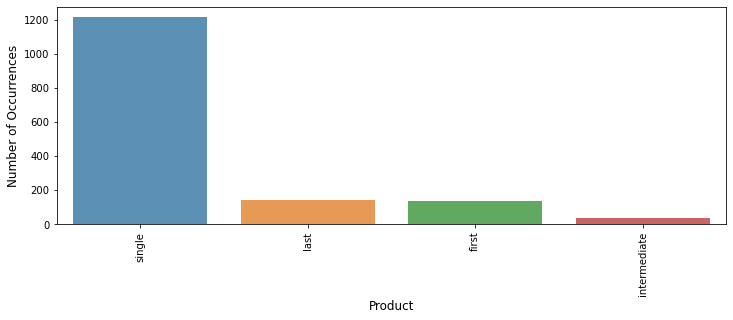

In [15]:
cnt_pro = test['MLclass'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(cnt_pro.index, cnt_pro.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Product', fontsize=12)
plt.xticks(rotation=90)
plt.show();

In [16]:
train_tagged = train.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['Text']), tags=[r.MLclass]), axis=1)
test_tagged = test.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['Text']), tags=[r.MLclass]), axis=1)

In [17]:
train.dtypes

Unnamed: 0     int64
Text          object
MLclass       object
dtype: object

In [18]:
import multiprocessing

from gensim.models import Doc2Vec

from tqdm import tqdm
cores = multiprocessing.cpu_count()
model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, hs=0, min_count=2, sample = 0, workers=cores)
model_dbow.build_vocab([x for x in tqdm(train_tagged.values)])

100%|██████████████████████████████████████████████████████████████████████████| 6128/6128 [00:00<00:00, 875611.33it/s]


In [19]:
%%time
for epoch in range(30):
    model_dbow.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|██████████████████████████████████████████████████████████████████████████| 6128/6128 [00:00<00:00, 678189.26it/s]


Wall time: 25 s


In [29]:
def vec_for_learning(model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
    return np.array(targets), np.array(regressors)

In [58]:
from sklearn.preprocessing import LabelEncoder 
y_train, X_train = vec_for_learning(model_dbow, train_tagged)
y_test, X_test = vec_for_learning(model_dbow, test_tagged)
encoder = LabelEncoder()
encoder.fit(y_train)
y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)

In [32]:
X_train.shape

(6128, 300)

In [33]:
y_train.shape

(6128,)

In [60]:
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestClassifier, ExtraTreesClassifier, ExtraTreesClassifier, StackingClassifier, StackingClassifier
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


base1 = ('rf', RandomForestClassifier(n_estimators = 100))
base2 = ('et', ExtraTreesClassifier(n_estimators=100))
# base3 = ('ridge1', Ridge(alpha=10))
# base4 = ('ridge2', Ridge(alpha=1))
# base5 = ('ridge3', Ridge(alpha=0.1))
base6 = ('dt', DecisionTreeClassifier())
base7 = ('dt_small', DecisionTreeClassifier(max_depth = 15, min_samples_leaf=5))
base8 = ('knn1', KNeighborsClassifier(n_neighbors=10))
base9 = ('knn2', KNeighborsClassifier(n_neighbors=5))
base10 = ('knn3', KNeighborsClassifier(n_neighbors=1))
# base4 = ('lr', OneVsOneClassifier(LogisticRegression()))
meta = RandomForestClassifier()

stacking = StackingClassifier([base1, base2, base6, base7, base8, base9, base10], meta, cv=10)

# clf = Pipeline([('stacking', stacking), ('clf', OneVsRestClassifier(RandomForestClassifier(n_estimators=100)))])
stacking.fit(X_train, y_train)
stacking.score(X_test, y_test)

0.79177545691906

In [56]:
clf = (RandomForestClassifier(n_estimators=100))
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7956919060052219

In [52]:
from sklearn.metrics import accuracy_score, f1_score
y_pred = clf.predict(X_test)
print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

Testing accuracy 0.6788511749347258
Testing F1 score: 0.6715516415092534


In [ ]:
logreg = LogisticRegression(n_jobs=1, C=1e5, class_weight="balanced")
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
from sklearn.metrics import accuracy_score, f1_score

print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

Testing accuracy 0.3674934725848564
Testing F1 score: 0.4476948207744089


In [ ]:
from sklearn.metrics import  plot_confusion_matrix
plot_confusion_matrix(logreg, y_test, y_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


ValueError: ignored